Trying to predict average increase in land temperatures of my motherland , INDIA

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Set Matplotlib defaults
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

Reading the city temperature file to attain maximum info of country

In [3]:
df  = pd.read_csv('GlobalLandTemperaturesByCity.csv')
df.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  \
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
8599207  Zwolle  Netherlands   52.24N     5.26E  
8599208  Zwolle  Netherlands   52.24N     5.26E  
8599209  Zwolle  Netherlands   52.24N     5.26E  
8599210  Zwolle  Netherlands   52.24N     5.26E  
8599211  Zwolle  Netherlands   52.24N     5.26E

In [4]:
df.shape

(8599212, 7)

In [5]:
df = df.dropna()
df_india = df[df.Country=="India"]
df_india.index = pd.to_datetime(df_india.dt)
#df_india.iloc[50:55]
df_india.head()

dt  AverageTemperature  AverageTemperatureUncertainty  \
dt                                                                          
1816-03-01  1816-03-01              19.934                          2.258   
1816-04-01  1816-04-01              26.641                          3.398   
1816-05-01  1816-05-01              32.535                          2.408   
1816-06-01  1816-06-01              33.254                          2.123   
1816-07-01  1816-07-01              31.105                          1.848   

              City Country Latitude Longitude  
dt                                             
1816-03-01  Abohar   India   29.74N    73.85E  
1816-04-01  Abohar   India   29.74N    73.85E  
1816-05-01  Abohar   India   29.74N    73.85E  
1816-06-01  Abohar   India   29.74N    73.85E  
1816-07-01  Abohar   India   29.74N    73.85E

In [6]:
df_india.shape

(960548, 7)

In order to perform time series analysis, we will only require our target values indexed with time index which is dates

In [7]:
india_temp = df[['dt' , 'AverageTemperature']]

In [8]:
india_temp.head()

dt  AverageTemperature
0  1743-11-01               6.068
5  1744-04-01               5.788
6  1744-05-01              10.644
7  1744-06-01              14.051
8  1744-07-01              16.082

Text(0, 0.5, 'Average Land Temperature')

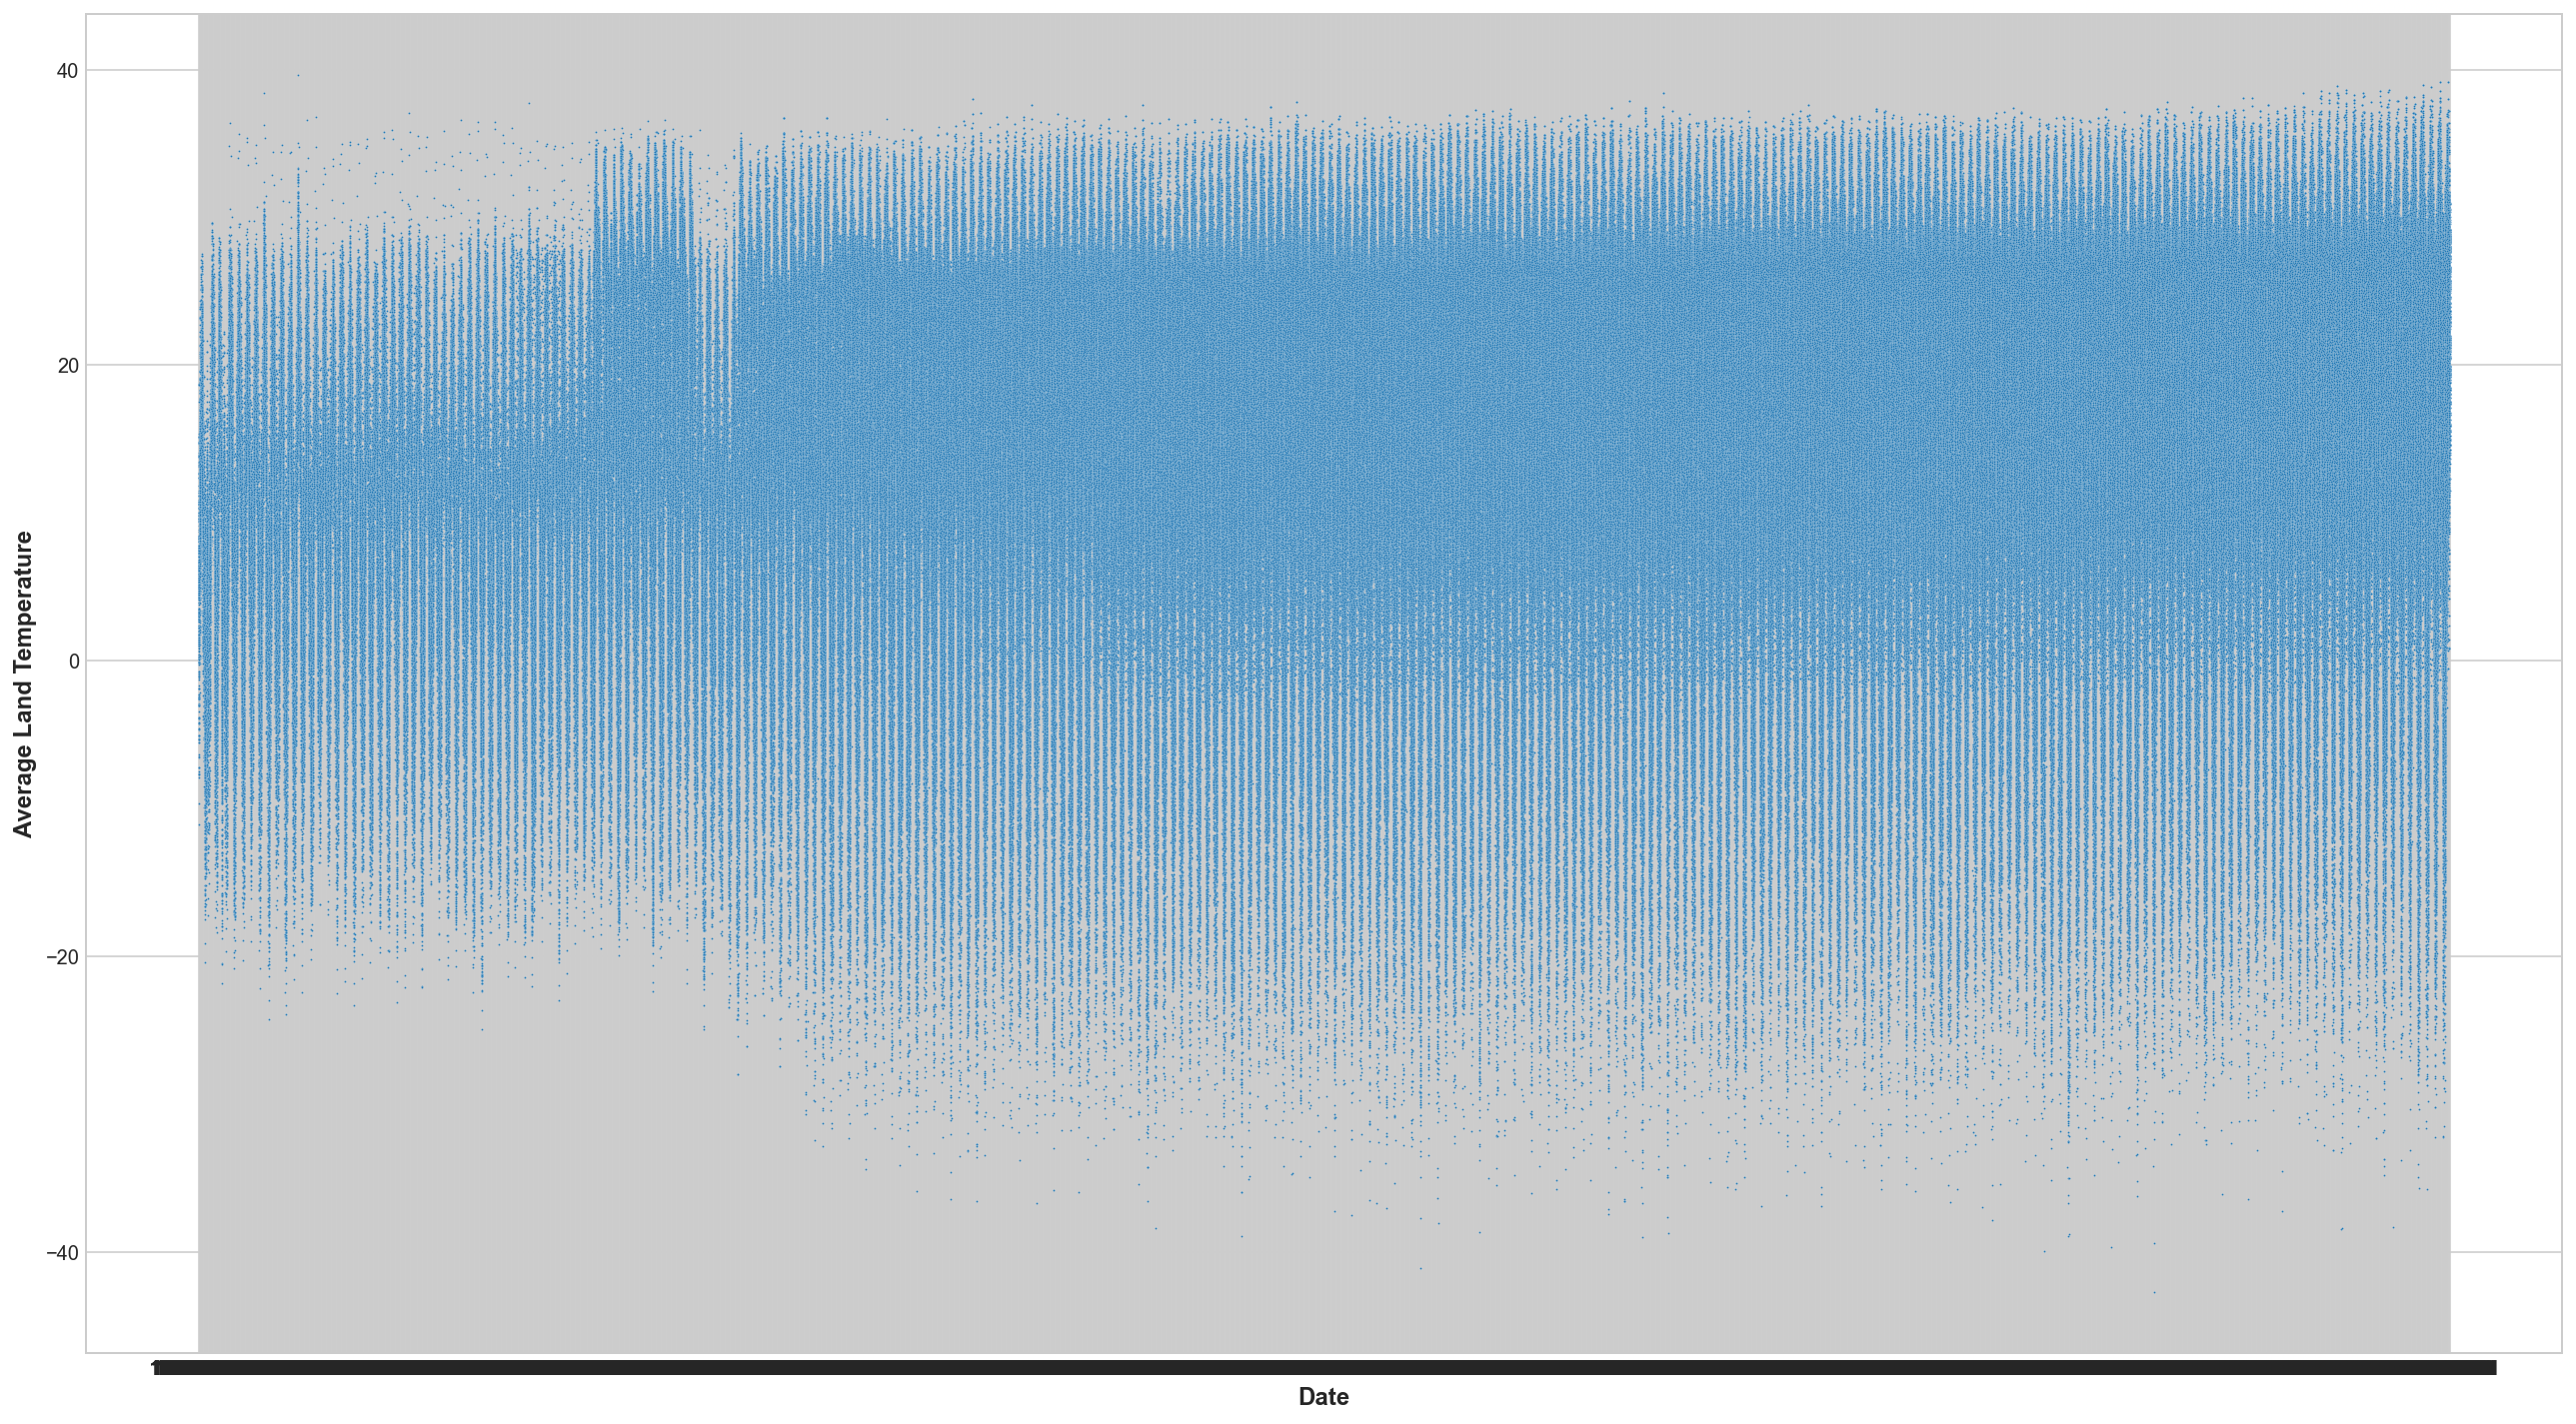

In [9]:
plt.figure(figsize=(18,10))

sns.scatterplot(x = india_temp['dt'] , y = india_temp['AverageTemperature'], s=1)
plt.xlabel('Date')
plt.ylabel('Average Land Temperature')

As the data is sparsed over 250 years , date indexing is not a good idea so we can use average yearly values of temperature

In [15]:
india_temp['Date'] = pd.to_datetime(india_temp.dt, format='%Y-%d-%m')
india_temp['Year'] = india_temp['Date'].dt.year
#india_temp['Date'] = india_temp['Date'].map( dt.datetime.toordinal)
india_temp.tail()

C:\Users\Kunal Sharma\AppData\Local\Temp/ipykernel_17268/2889214616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_temp['Date'] = pd.to_datetime(india_temp.dt, format='%Y-%d-%m')
C:\Users\Kunal Sharma\AppData\Local\Temp/ipykernel_17268/2889214616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_temp['Year'] = india_temp['Date'].dt.year


dt  AverageTemperature       Date  Year
8599206  2013-04-01               7.710 2013-01-04  2013
8599207  2013-05-01              11.464 2013-01-05  2013
8599208  2013-06-01              15.043 2013-01-06  2013
8599209  2013-07-01              18.775 2013-01-07  2013
8599210  2013-08-01              18.025 2013-01-08  2013

Creating the avg temperature feature which will be our new taget

In [16]:
df = india_temp.groupby('Year')['AverageTemperature'].mean().reset_index()

In [17]:
df.head()

Year  AverageTemperature
0  1743            4.882424
1  1744           10.734047
2  1745            1.497593
3  1750            9.872808
4  1751           10.046739

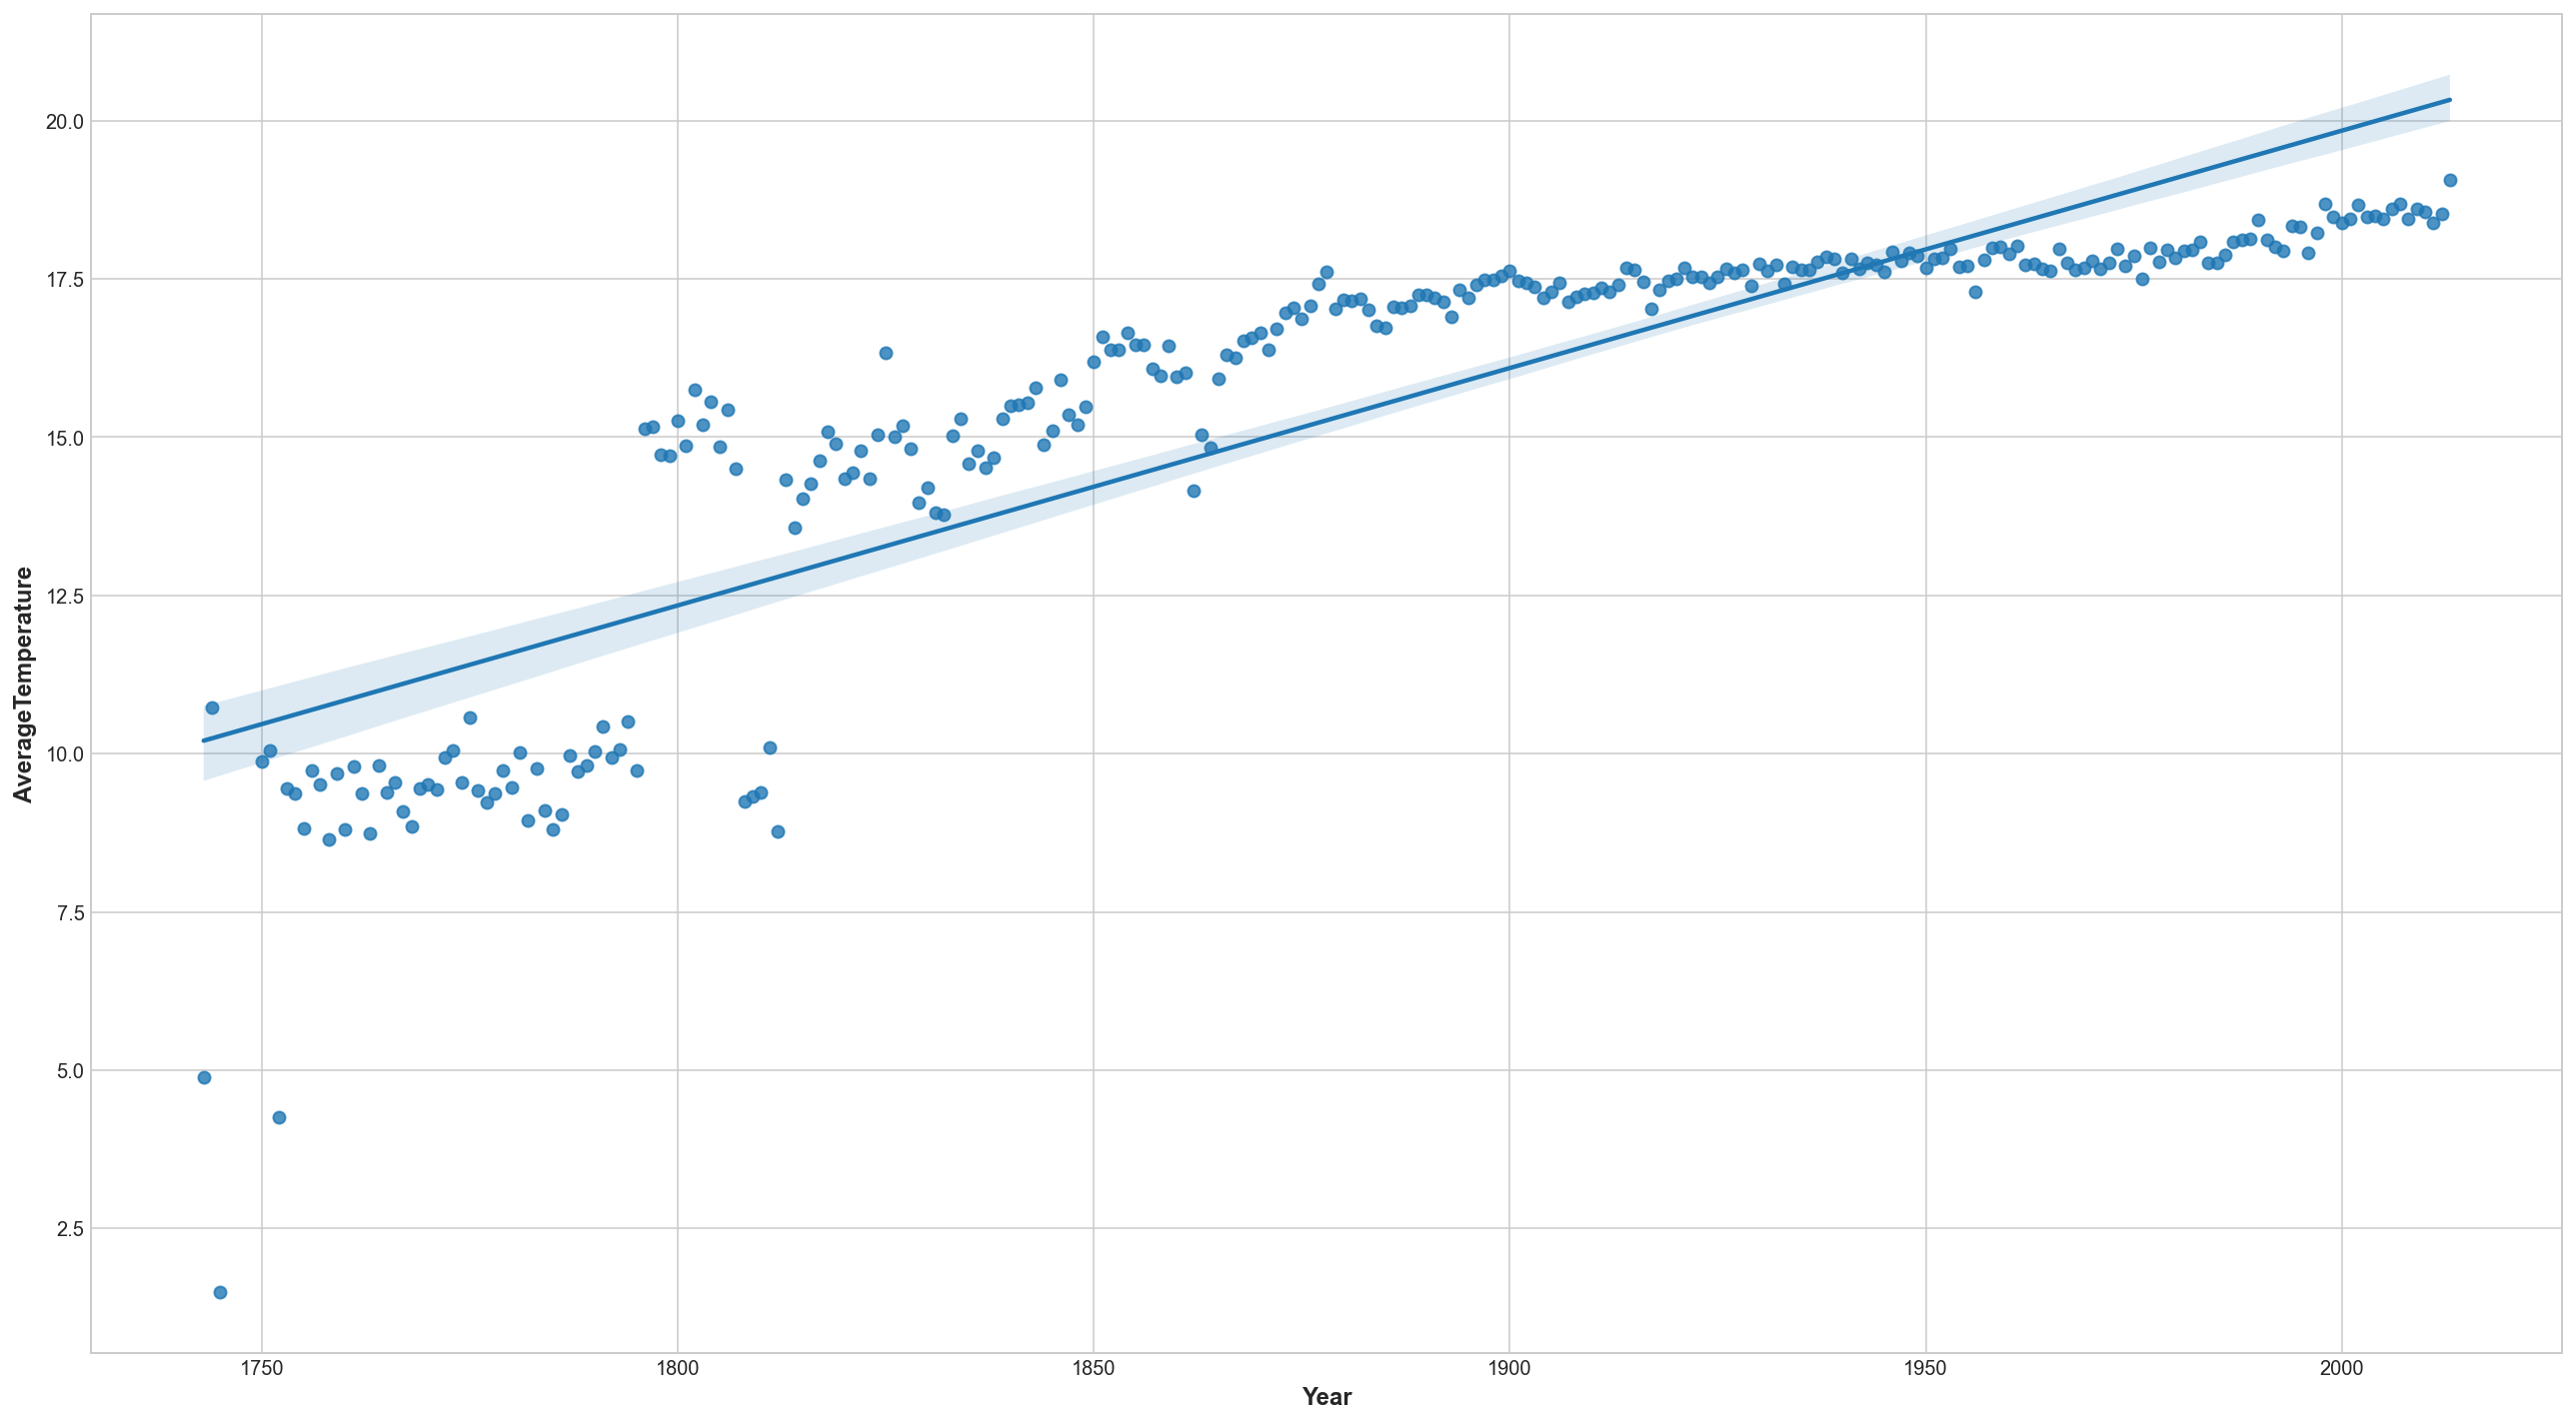

In [18]:
plt.figure(figsize=(18,10))
sns.regplot( x = df['Year'], y = df['AverageTemperature'])
plt.show()

Using deterministic process we can use create in_sample(to learn parameters from our data) and out_of_sample data(for forecasting )

In [19]:
from statsmodels.tsa.deterministic import DeterministicProcess

avg_temp = india_temp.groupby('Year').mean()['AverageTemperature']

y = avg_temp.copy()

dp = DeterministicProcess(index=y.index , order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=99)

c:\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [20]:
model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)


Plotting the forecast of upcoming years (Visualising the trend) 

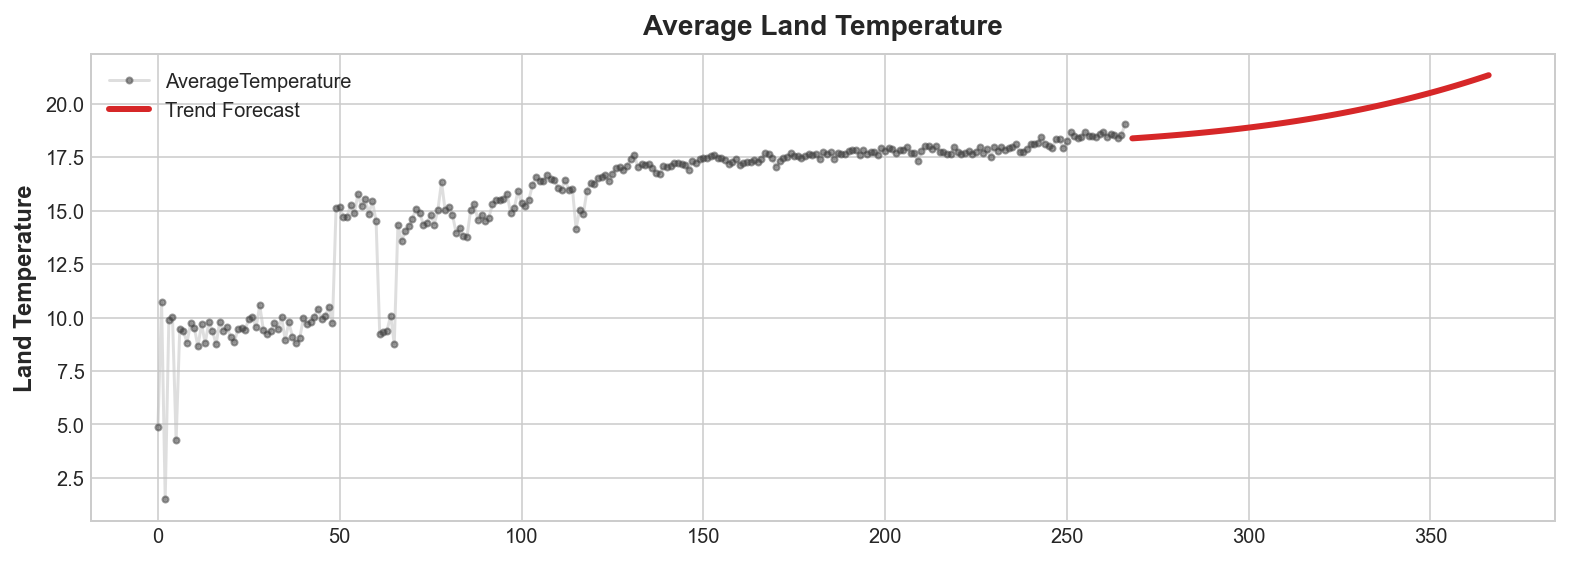

In [28]:
import matplotlib as plt
ax = y.plot(**plot_params, alpha=0.5, title="Average Land Temperature", ylabel="Land Temperature")
#ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend()

Training over complete data

In [21]:
lr = LinearRegression()
X = df['Year']
y = df['AverageTemperature']

X = X.values.reshape(-1,1)

lr.fit(X, y)

y_pred = lr.predict(X)

In [22]:
print(lr.coef_)
print(10 * lr.coef_)

[0.03750276]
[0.3750276]


These coefficients represent the annual change in value of temperature

Checking for custom input

In [24]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[20.9680667  22.09314949]


Interpretation

Every year, the average land temperature increases by an average of 0.0375 °C. Every ten years, the average land temperature increases by an average of
0.3750276 °C. The average land temperature in 2030 will be 20.9680 °C and in 2050 ~ 21.7181 °C.